In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.firefox.options import Options
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import re
import time
import seaborn as sns

In [2]:
def scroll(driver, timeout, loops):
    scroll_pause_time = timeout

    last_height = driver.execute_script("return document.body.scrollHeight")
    num = 0
    
    while True and num < loops:
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        num = num + 1
        time.sleep(scroll_pause_time)
        new_height = driver.execute_script("return document.body.scrollHeight")
        if new_height == last_height:
            break
        last_height = new_height

In [11]:
def scrape_red():
    url = 'https://www.vivino.com/explore?e=eJzLLbI11jNVy83MszVQy02ssDUyNjBQS660dfFWSwYS3moFtoZq6Wm2ZYlFmakliTlq-Um2avm2auUl0bG2hgBUlRMv'
    product_names = []
    profile = webdriver.FirefoxProfile()
    profile.set_preference("general.useragent.override", "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:81.0) Gecko/20100101 Firefox/81.0")
    options = Options()
    options.headless = True
    browser = webdriver.Firefox(options=options)
    options.add_argument("start-maximized")
    options.add_argument('disable-infobars')
    browser.get(url)

    loops = 2
    timeout = 5
    scroll(browser, timeout, loops)

    titles = browser.find_elements_by_class_name('vintageTitle__wine--U7t9G')
    prices = browser.find_elements_by_xpath("(//*[contains(@class, 'addToCartButton__price')])")
    ratings = browser.find_elements_by_class_name('vivinoRating__averageValue--3Navj')
    reviews = browser.find_elements_by_class_name('vivinoRating__caption--3tZeS')
    countries = browser.find_elements_by_xpath('//a[contains(@href, "/explore?country_code")]')
#for price in prices:
#    print('price:',price.text)
    for title, price, rating, review, country in zip(titles, prices, ratings, reviews, countries):
        with open('redwinedata.csv', 'a', encoding='UTF8') as f:
            writer = csv.writer(f)
            date = 9999
            line = re.findall(r'\d+', title.text)
        
            if(len(line)>0):
                for l in line:
                    if(len(str(l)) == 4):
                        date = l
                    
            data = [title.text, date, price.text.split("\n", 1)[0], rating.text, review.text.split(" ", 1)[0], country.text]
            writer.writerow(data)

In [10]:
def scrape_white():
    url = 'https://www.vivino.com/explore?e=eJzLLbI11jNVy83MszVQy02ssDUyNjBQS660dfFWSwYS3moFtoZq6Wm2ZYlFmakliTlq-Um2avm2auUl0bG2RgBUlhMw'
    product_names = []
    profile = webdriver.FirefoxProfile()
    profile.set_preference("general.useragent.override", "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:81.0) Gecko/20100101 Firefox/81.0")
    options = Options()
    options.headless = True
    browser = webdriver.Firefox(options=options)
    options.add_argument("start-maximized")
    options.add_argument('disable-infobars')
    browser.get(url)

    loops = 2
    timeout = 5
    scroll(browser, timeout, loops)

    titles = browser.find_elements_by_class_name('vintageTitle__wine--U7t9G')
    prices = browser.find_elements_by_xpath("(//*[contains(@class, 'addToCartButton__price')])")
    ratings = browser.find_elements_by_class_name('vivinoRating__averageValue--3Navj')
    reviews = browser.find_elements_by_class_name('vivinoRating__caption--3tZeS')
    countries = browser.find_elements_by_xpath('//a[contains(@href, "/explore?country_code")]')
#for price in prices:
#    print('price:',price.text)
    for title, price, rating, review, country in zip(titles, prices, ratings, reviews, countries):
        with open('whitewinedata.csv', 'a', encoding='UTF8') as f:
            writer = csv.writer(f)
            date = 9999
            line = re.findall(r'\d+', title.text)
        
            if(len(line)>0):
                for l in line:
                    if(len(str(l)) == 4):
                        date = l
                    
            data = [title.text, date, price.text.split("\n", 1)[0], rating.text, review.text.split(" ", 1)[0], country.text]
            writer.writerow(data)

In [9]:
def scrape_sparkling():
    url = 'https://www.vivino.com/explore?e=eJzLLbI11jNVy83MszVQy02ssDUyNjBQS660dfFWSwYS3moFtoZq6Wm2ZYlFmakliTlq-Um2avm2auUl0bG2xgBUlxMx'
    product_names = []
    profile = webdriver.FirefoxProfile()
    profile.set_preference("general.useragent.override", "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:81.0) Gecko/20100101 Firefox/81.0")
    options = Options()
    options.headless = True
    browser = webdriver.Firefox(options=options)
    options.add_argument("start-maximized")
    options.add_argument('disable-infobars')
    browser.get(url)

    loops = 2
    timeout = 5
    scroll(browser, timeout, loops)

    titles = browser.find_elements_by_class_name('vintageTitle__wine--U7t9G')
    prices = browser.find_elements_by_xpath("(//*[contains(@class, 'addToCartButton__price')])")
    ratings = browser.find_elements_by_class_name('vivinoRating__averageValue--3Navj')
    reviews = browser.find_elements_by_class_name('vivinoRating__caption--3tZeS')
    countries = browser.find_elements_by_xpath('//a[contains(@href, "/explore?country_code")]')
#for price in prices:
#    print('price:',price.text)
    for title, price, rating, review, country in zip(titles, prices, ratings, reviews, countries):
        with open('sparklingwinedata.csv', 'a', encoding='UTF8') as f:
            writer = csv.writer(f)
            date = 9999
            line = re.findall(r'\d+', title.text)
        
            if(len(line)>0):
                for l in line:
                    if(len(str(l)) == 4):
                        date = l
                    
            data = [title.text, date, price.text.split("\n", 1)[0], rating.text, review.text.split(" ", 1)[0], country.text]
            writer.writerow(data)

In [105]:
red_df = pd.read_csv('redwinedata.csv', names=["Name", "Year", "Price", "Rating", "Review", "Country"])
#red_df.drop(red_df[red_df.Review < 112].index, inplace=False)
red_df.describe()

,Year,Price,Rating,Review
count,75.000000,75.000000,75.000000,75.000000
mean,2013.253333,1243.586000,4.634667,778.040000
std,5.314675,590.062996,0.055734,1816.935528
min,1982.000000,299.000000,4.600000,26.000000
25%,2012.500000,672.000000,4.600000,112.500000
50%,2015.000000,1199.950000,4.600000,258.000000
75%,2016.000000,1734.975000,4.700000,552.500000
max,2018.000000,2299.950000,4.800000,13942.000000


In [106]:
white_df = pd.read_csv('whitewinedata.csv', names=["Name", "Year", "Price", "Rating", "Review", "Country"])
#white_df.drop(white_df[white_df.Review < 65].index, inplace=False)
white_df.describe()

,Year,Price,Rating,Review
count,75.000000,75.000000,75.000000,75.000000
mean,2015.813333,792.245333,4.458667,151.253333
std,2.507790,486.647653,0.071836,164.153035
min,2005.000000,109.000000,4.400000,27.000000
25%,2015.000000,452.475000,4.400000,65.000000
50%,2016.000000,650.000000,4.400000,93.000000
75%,2018.000000,995.000000,4.500000,180.500000
max,2019.000000,2299.950000,4.700000,897.000000


In [107]:
sparkling_df = pd.read_csv('sparklingwinedata.csv', names=["Name", "Year", "Price", "Rating", "Review", "Country"])
#sparkling_df.drop(sparkling_df[sparkling_df.Review < 95].index, inplace=False)
sparkling_df.describe()

,Year,Price,Rating,Review
count,75.000000,75.000000,75.000000,75.000000
mean,3712.413333,1054.647333,4.446667,3735.920000
std,3295.823041,543.189631,0.111904,12824.579678
min,1998.000000,89.000000,4.300000,27.000000
25%,2006.000000,572.000000,4.300000,95.500000
50%,2008.000000,995.000000,4.500000,572.000000
75%,2013.000000,1424.500000,4.500000,1745.500000
max,9999.000000,2299.000000,4.600000,103806.000000


In [99]:
!pip install ipynb
from ipynb.fs.full.Plot_rating import plot_rating, describe

Lowest rated Country    Argentina
Rating           4.6
dtype: object 

Median rated Rating    4.657143
dtype: float64 

Highest rated  Country    United States
Rating               4.7
dtype: object 



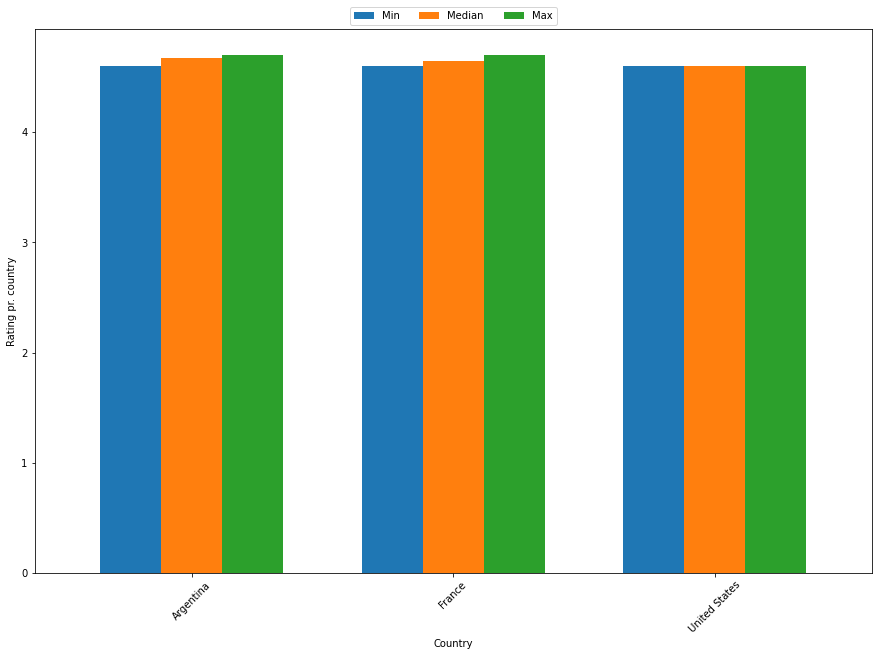

In [100]:
red_df = pd.read_csv('redwinedata.csv', names=["Name", "Year", "Price", "Rating", "Review", "Country"])
red_df.drop(red_df[red_df.Review < 112].index, inplace=False)
plot_rating(red_df)

Lowest rated Country   NaN
Rating    NaN
dtype: float64 

Median rated Country   NaN
Rating    NaN
dtype: float64 

Highest rated  Country   NaN
Rating    NaN
dtype: float64 



IndexError: index 0 is out of bounds for axis 0 with size 0

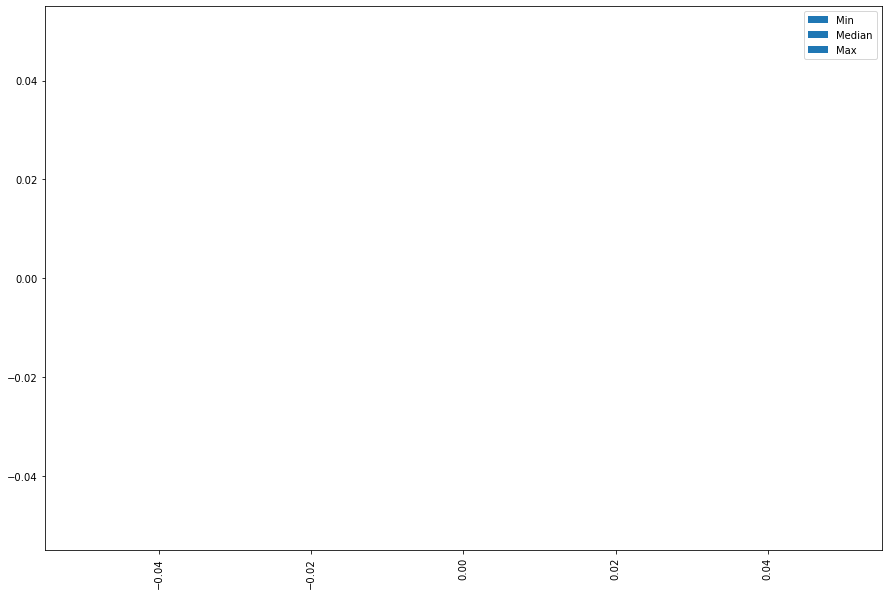

In [101]:
white = white_df.copy()
#white
plot_rating(white)

Lowest rated Country    France
Rating        4.3
dtype: object 

Median rated Rating    4.431818
dtype: float64 

Highest rated  Country    Italy
Rating       4.6
dtype: object 



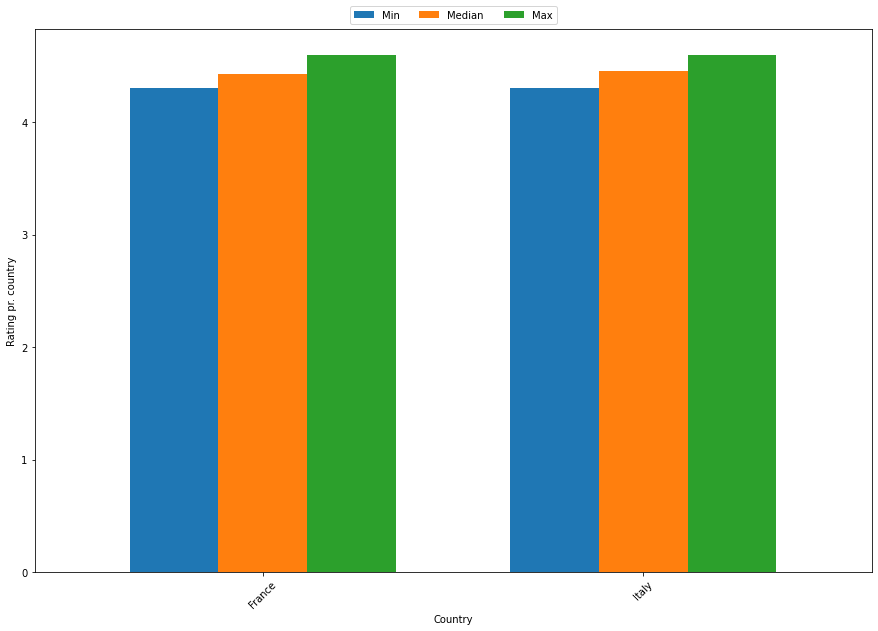

In [102]:
sparkling = sparkling_df.copy()
sparkling
plot_rating(sparkling)